<a href="https://colab.research.google.com/github/vaimessi/Data-Science-Projects/blob/main/Sticker_Sales_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

In [3]:
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c playground-series-s5e1

  0% 0.00/2.26M [00:00<?, ?B/s]
100% 2.26M/2.26M [00:00<00:00, 181MB/s]


In [5]:
! unzip playground-series-s5e1.zip

Archive:  playground-series-s5e1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
from ast import Index
import pandas as pd

df = pd.read_csv("/content/train.csv")

In [7]:
df.head(5)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [8]:
# prompt: find how many na values are there in the num_sold column in df

df['num_sold'].isna().sum()

8871

In [9]:
df['num_sold'].sum()

166503456.0

In [10]:
# Calculate the mean of 'num_sold', ignoring NaN values
mean_num_sold = df['num_sold'].mean()

# Fill NaN values in 'num_sold' with the calculated mean
df['num_sold'].fillna(mean_num_sold, inplace=True)

# Verify the changes (optional)
print(df['num_sold'].isna().sum())  # Should print 0

0


<ipython-input-10-7671a4844e95>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_sold'].fillna(mean_num_sold, inplace=True)


In [11]:

df['num_sold'].isna().sum()

0

In [12]:
df.head(5)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,752.527382
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.000000
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.000000
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.000000
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.000000


In [13]:
df['num_sold'] = df['num_sold'].round(2)

In [14]:
df.head(5)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,752.53
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.00
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.00
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.00
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.00


In [15]:
df['product'].value_counts()

,count
product,
Holographic Goose,46026
Kaggle,46026
Kaggle Tiers,46026
Kerneler,46026
Kerneler Dark Mode,46026


In [16]:
df['store'].value_counts()

,count
store,
Discount Stickers,76710
Stickers for Less,76710
Premium Sticker Mart,76710


In [17]:
df['country'].value_counts()

,count
country,
Canada,38355
Finland,38355
Italy,38355
Kenya,38355
Norway,38355
Singapore,38355


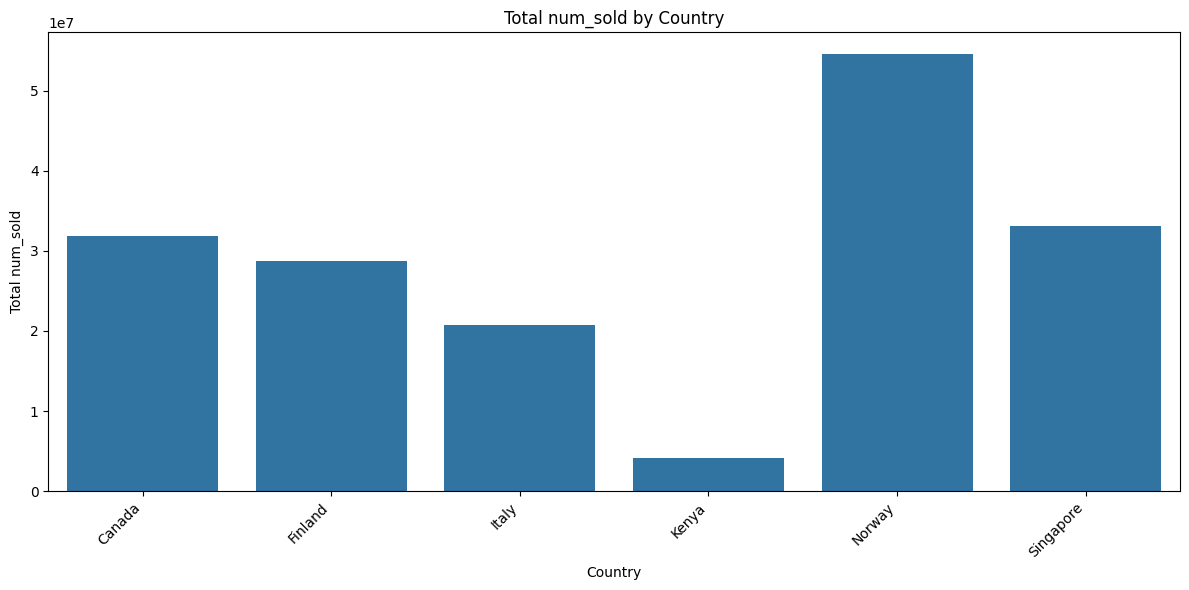

In [18]:
# prompt: generate a graph for total num_sold by each country in the df dataframe above

import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and sum num_sold
country_sales = df.groupby('country')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xlabel('Country')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [19]:
df.groupby('country')['num_sold'].sum()

,num_sold
country,
Canada,31848337.38
Finland,28698872.00
Italy,20797669.00
Kenya,4169592.25
Norway,54562305.00
Singapore,33102374.00


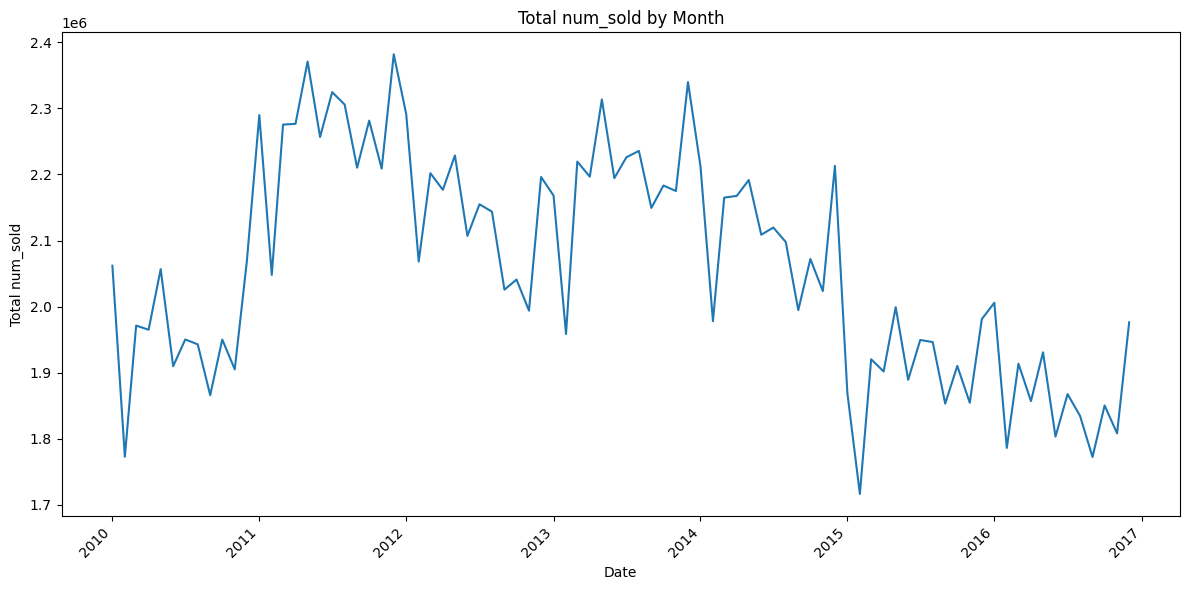

In [20]:
# prompt: generate a time series graph for total num_sold by each month in the df dataframe above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'date' column exists and is in datetime format
# If not, convert it first: df['date'] = pd.to_datetime(df['date'])

# Convert 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, then sum num_sold
monthly_sales = df.groupby(['year', 'month'])['num_sold'].sum().reset_index()

# Create a datetime index for plotting
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(DAY=1))
monthly_sales = monthly_sales.set_index('date')

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['num_sold'])
plt.xlabel('Date')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
df.head(5)

,id,date,country,store,product,num_sold,year,month
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,752.53,2010,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.00,2010,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.00,2010,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.00,2010,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.00,2010,1


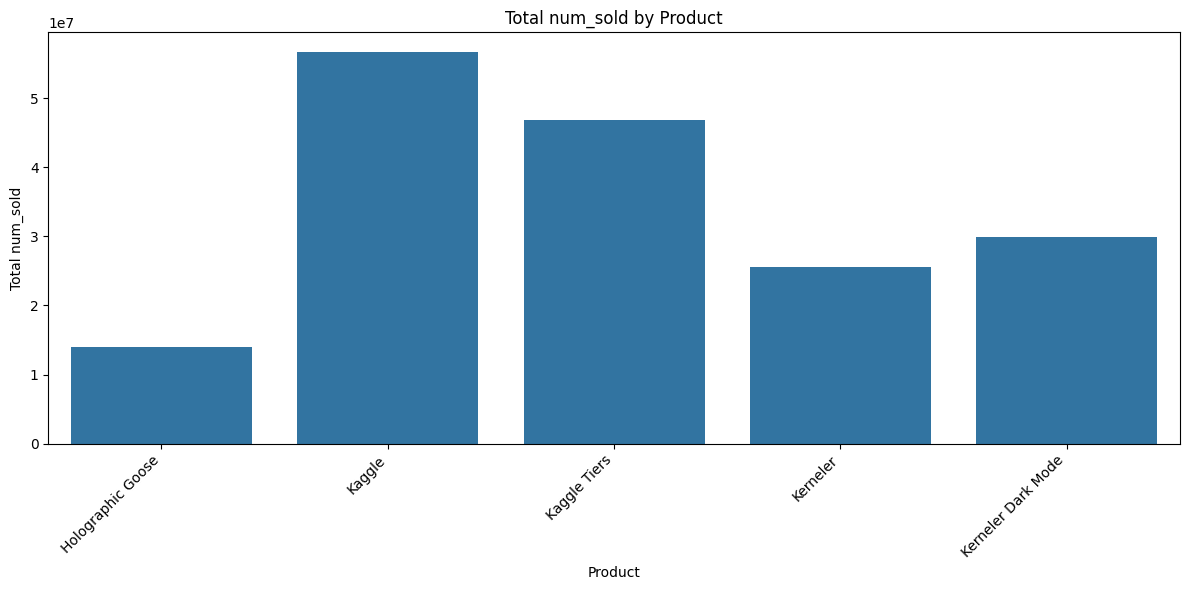

In [22]:
# prompt: plot a graph to identify num_sold group it by product

import matplotlib.pyplot as plt
import seaborn as sns

# Group by product and sum num_sold
product_sales = df.groupby('product')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xlabel('Product')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

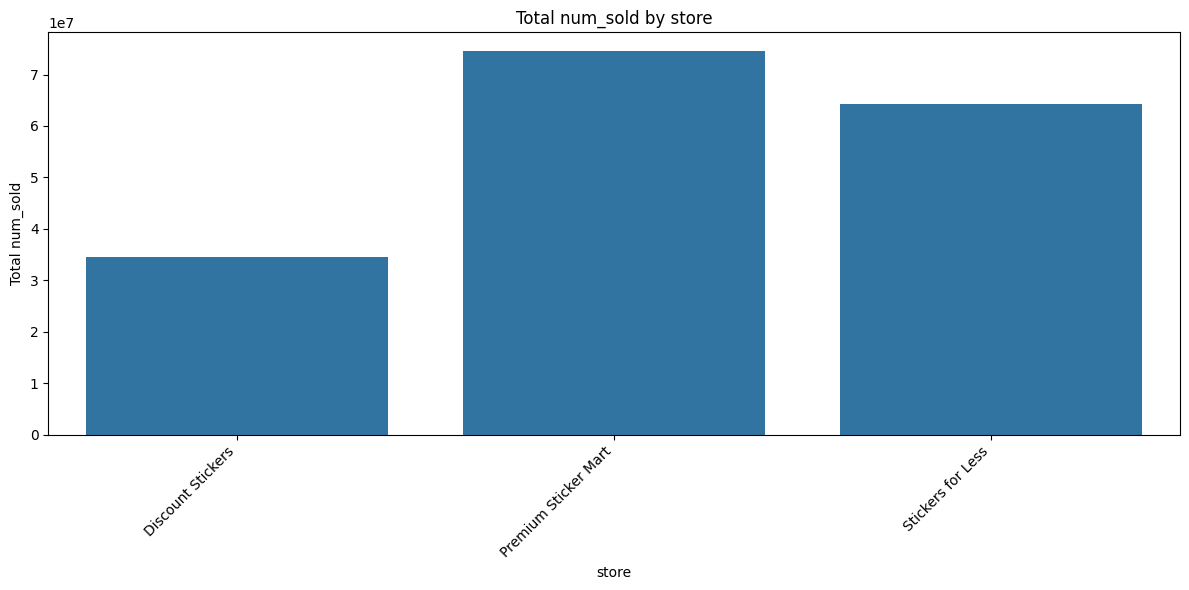

In [23]:
product_sales = df.groupby('store')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xlabel('store')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by store')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error: 93901.08552790979
Forecast for the next 6 months:
2015-08-01    1.939422e+06
2015-09-01    1.945105e+06
2015-10-01    1.941321e+06
2015-11-01    1.943050e+06
2015-12-01    1.943210e+06
2016-01-01    1.943258e+06
Freq: MS, Name: predicted_mean, dtype: float64


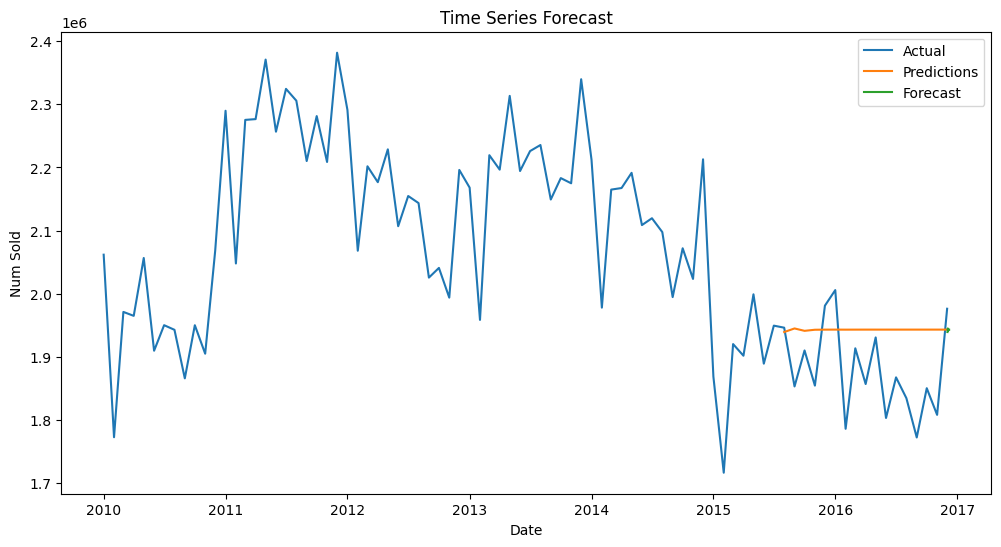

In [24]:
# prompt: use time series analysis to create a predictive model to forecast num_sold in the df dataframe

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the time series data
# Assuming 'monthly_sales' DataFrame from the previous code
# with 'date' as datetime index and 'num_sold' as the values
# If you have a different DataFrame or data format, adapt this part
train_data = monthly_sales['num_sold']


# Split the data into training and testing sets (e.g., 80/20 split)
train_size = int(len(train_data) * 0.8)
train, test = train_data[:train_size], train_data[train_size:]

# Fit the ARIMA model (adjust (p, d, q) order as needed)
model = ARIMA(train, order=(5,1,0)) # Example order, tune for optimal performance
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train_data)-1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rmse}')


# Forecast future values (e.g., the next 6 months)
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecast
print(f'Forecast for the next {forecast_steps} months:')
print(forecast)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data, label='Actual')
plt.plot(test.index, predictions, label='Predictions')
plt.plot(pd.date_range(start=train_data.index[-1], periods=forecast_steps+1)[1:], forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Num Sold')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

In [26]:
# prompt: create a df_copy dataframe from df dataframe and label encode store, product and country columns

from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_copy = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'store', 'product', and 'country' columns
for col in ['store', 'product', 'country']:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy.head(5)

,id,date,country,store,product,num_sold,year,month
0,0,2010-01-01,0,0,0,752.53,2010,1
1,1,2010-01-01,0,0,1,973.00,2010,1
2,2,2010-01-01,0,0,2,906.00,2010,1
3,3,2010-01-01,0,0,3,423.00,2010,1
4,4,2010-01-01,0,0,4,491.00,2010,1


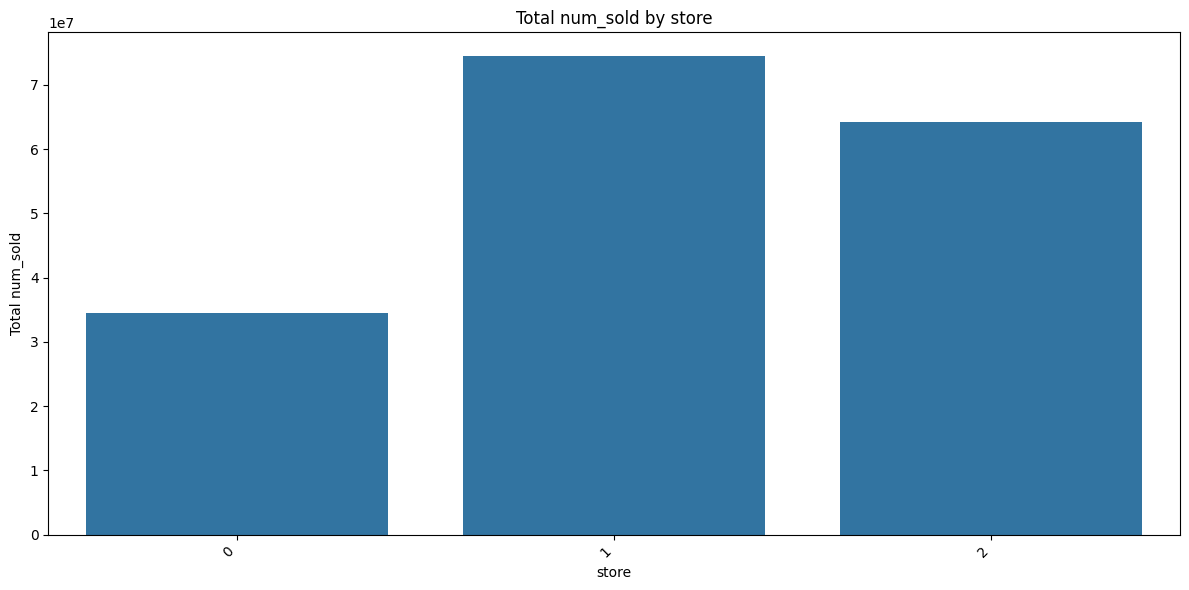

In [27]:
product_sales = df_copy.groupby('store')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xlabel('store')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by store')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

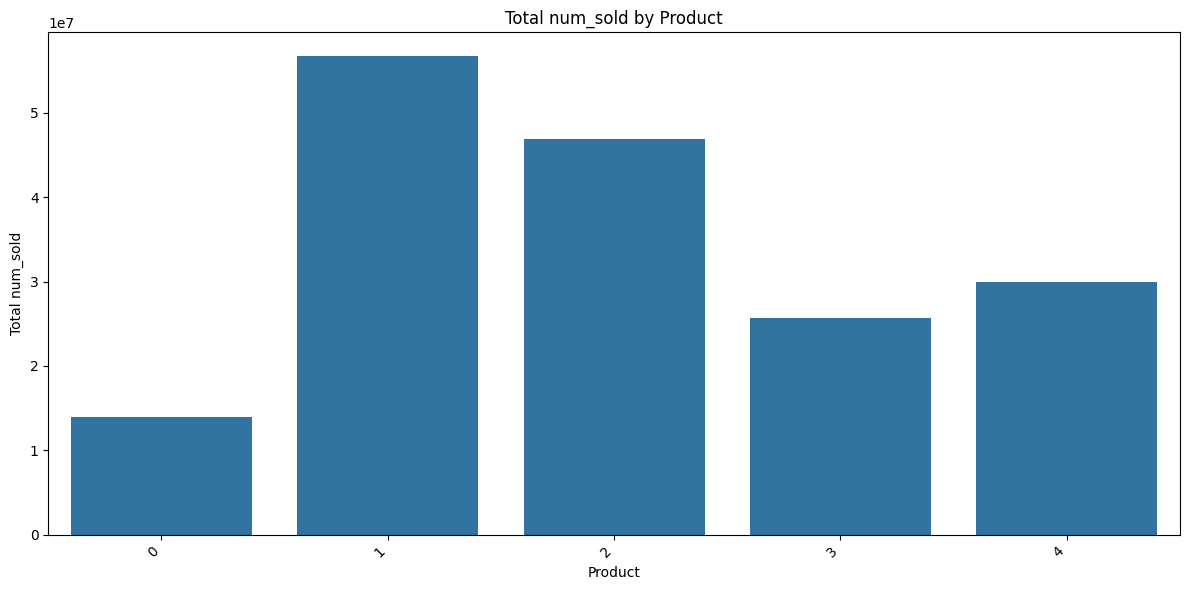

In [28]:
product_sales = df_copy.groupby('product')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xlabel('Product')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

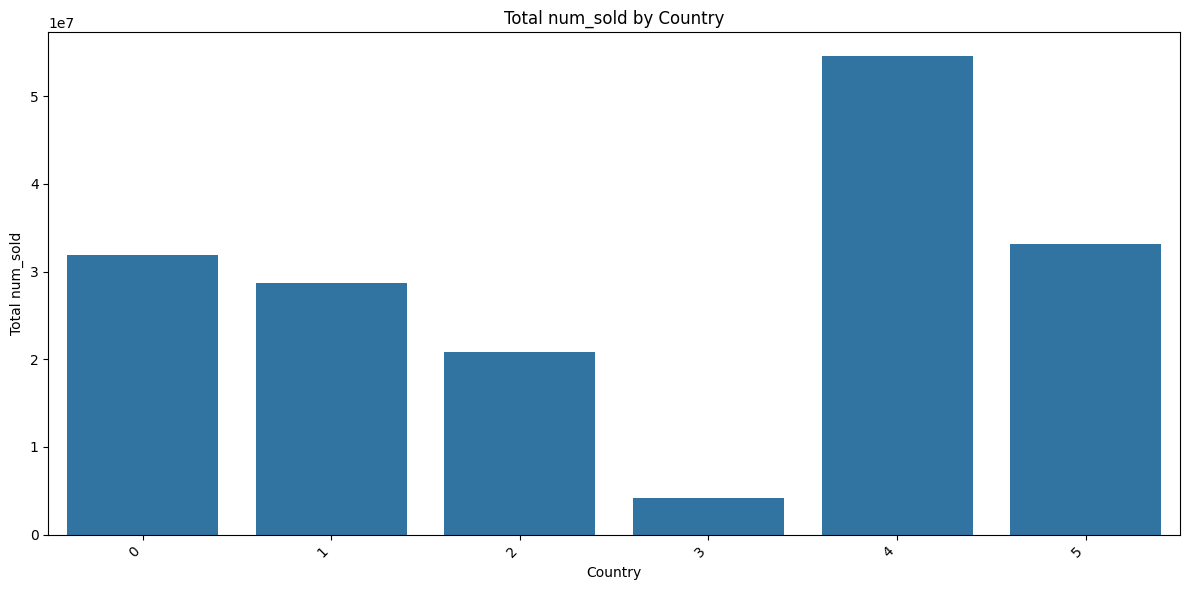

In [30]:
country_sales = df_copy.groupby('country')['num_sold'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xlabel('Country')
plt.ylabel('Total num_sold')
plt.title('Total num_sold by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

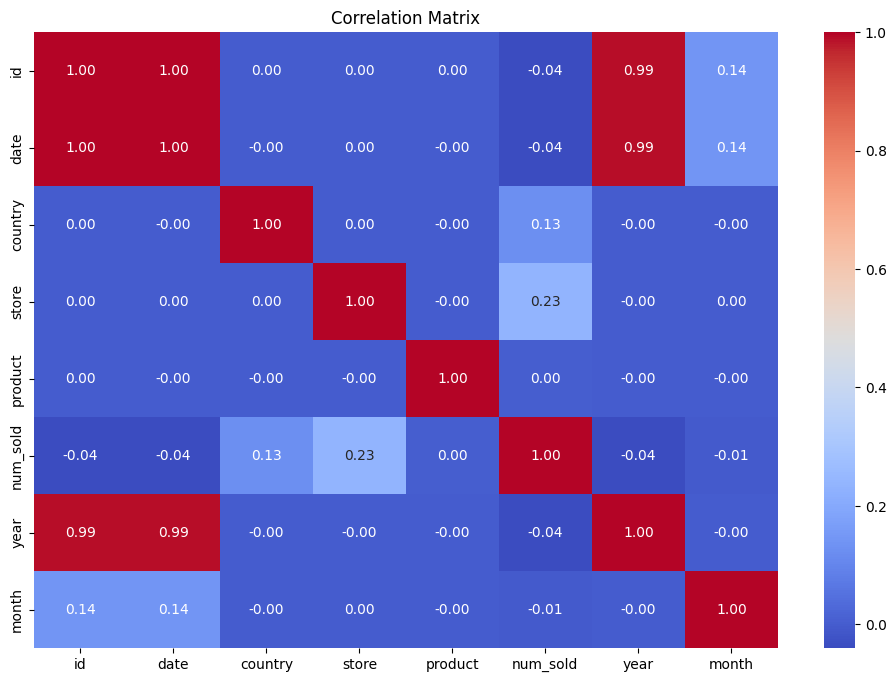

In [32]:
# prompt: use df_copy to create a correlation matrix with target variable as num_sold and plot it in a heatmap

# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
# prompt: use ensemble learning method to predict num_sold with features - date, country, store and product

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for data loading and preprocessing) ...

# Feature Engineering (if needed) - Example:
# You might create features like day of the week, week of the year, etc.

# Prepare data for modeling
X = df_copy[['year','store', 'product', 'country']]
y = df_copy['num_sold']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train multiple models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Adjust parameters as needed
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42) # Adjust parameters as needed

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions using both models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Ensemble predictions (simple average)
ensemble_predictions = (rf_predictions + gb_predictions) / 2


# Example prediction for a new data point
# new_data_point = pd.DataFrame({'date': [pd.to_datetime('2024-01-15').toordinal()],
#                               'store': [0], 'product': [1], 'country': [2]})

# ensemble_prediction = (rf_model.predict(new_data_point) + gb_model.predict(new_data_point)) / 2
# print(f"Prediction for new data point: {ensemble_prediction}")

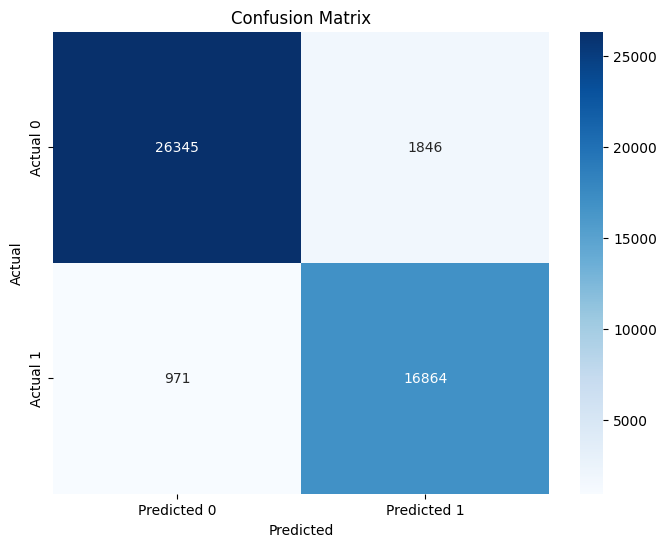

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     28191
           1       0.90      0.95      0.92     17835

    accuracy                           0.94     46026
   macro avg       0.93      0.94      0.94     46026
weighted avg       0.94      0.94      0.94     46026



In [35]:
# prompt: plot a confusion matrix and determine the precision, recall, accuracy and f1 score for the above model

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'ensemble_predictions' and 'y_test' are defined from your previous code

# Convert predictions to classes (e.g., using a threshold)
threshold = np.mean(y_test) # Example threshold - you may need to adjust this
predicted_classes = (ensemble_predictions >= threshold).astype(int)
actual_classes = (y_test >= threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, F1-score, and accuracy
print(classification_report(actual_classes, predicted_classes))

In [36]:
df_test = pd.read_csv("/content/test.csv")

df_test.head(5)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [37]:
# prompt: use the above created ensemble model on the df_test dataframe and predict num_sold

# Assuming df_test is already loaded and preprocessed similarly to df_copy

# Initialize LabelEncoder (if not already initialized)
le = LabelEncoder()

# Fit and transform the 'store', 'product', and 'country' columns in df_test
for col in ['store', 'product', 'country']:
    df_test[col] = le.fit_transform(df_test[col])

# Convert 'date' to ordinal if necessary
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].dt.year


# Prepare the features for prediction
X_test_final = df_test[['year','store', 'product', 'country']]

# Make predictions using the trained models
rf_predictions_final = rf_model.predict(X_test_final)
gb_predictions_final = gb_model.predict(X_test_final)

# Ensemble the predictions
ensemble_predictions_final = (rf_predictions_final + gb_predictions_final) / 2

# Add the predictions to the df_test dataframe
df_test['num_sold'] = ensemble_predictions_final

# Display the predictions
print(df_test[['date', 'store', 'product', 'country', 'num_sold']].head())

        date  store  product  country    num_sold
0 2017-01-01      0        0        0  656.087303
1 2017-01-01      0        1        0  730.195090
2 2017-01-01      0        2        0  562.642908
3 2017-01-01      0        3        0  278.685435
4 2017-01-01      0        4        0  333.698306


In [39]:
# prompt: create a dataframe "sample_submission" with columns "id" and "num_sold" from df_test dataframe and round off the num_sold to 0 decimal places

# Create the sample submission DataFrame
sample_submission = pd.DataFrame({'id': df_test['id'], 'num_sold': df_test['num_sold'].astype(int)})

# Display the first few rows of the sample submission
print(sample_submission.head())

       id  num_sold
0  230130       656
1  230131       730
2  230132       562
3  230133       278
4  230134       333


In [40]:
# prompt: export the sample_submission dataframe to csv and remove the indexes

# Export the sample_submission DataFrame to a CSV file without the index
sample_submission.to_csv('submission.csv', index=False)

In [41]:
# prompt: count the number of rows in sample_Submission dataframe

print(len(sample_submission))

98550
